# Statistics Lab Book

## Kolmogorov-Smirnov
How to get critical values.

In [1]:
import numpy as np
from scipy.stats import ksone,kstest
import matplotlib.pyplot as plt
import seaborn as sns
from d8analysis.service.io import IOService


In [2]:
fp = "data/Credit Score Classification Dataset.csv"
df = IOService.read(fp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             164 non-null    int64 
 1   Gender          164 non-null    object
 2   Income          164 non-null    int64 
 3   Education       164 non-null    object
 4   Marital Status  164 non-null    object
 5   Children        164 non-null    int64 
 6   Own             164 non-null    object
 7   Credit Rating   164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [9]:
alpha = 0.05
n = len(df["Children"])
loc = np.mean(df['Children'])
scale = np.std(df["Children"])

In [10]:
kstest(rvs=df["Children"], cdf="norm", alternative="two-sided")


KstestResult(statistic=0.5, pvalue=1.9441133633275066e-38)

<Axes: xlabel='Children', ylabel='Density'>

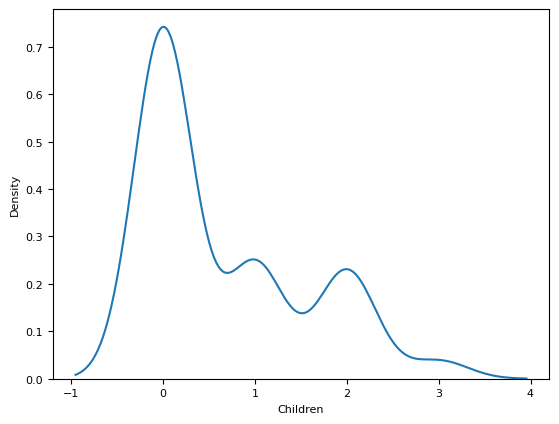

In [11]:
sns.kdeplot(data=df["Children"])

### Probability Density Function


<Axes: >

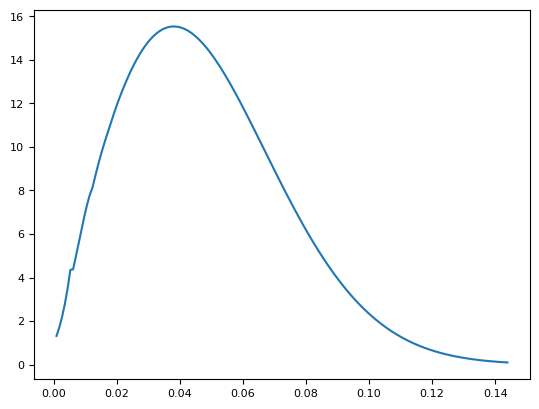

In [13]:
x = np.linspace(ksone.ppf(0.001, n),
                ksone.ppf(0.999, n), n)

y = ksone.pdf(x,n)
sns.lineplot(x=x, y=y)

In [16]:
lower = []
for i in range(n):
    lower.append(ksone.ppf(alpha/2,n))

upper = []
for i in range(n):
    upper.append(ksone.ppf(1-alpha/2,n))
d = {'lower': lower, 'upper': upper}    
cv = pd.DataFrame(d)
cv.describe()

,lower,upper
count,164.00,164.00
mean,0.01,0.10
std,0.00,0.00
min,0.01,0.10
25%,0.01,0.10
50%,0.01,0.10
75%,0.01,0.10
max,0.01,0.10
